## Régression Logistique
___

### Application de la régression logistique sur les données  Breast Cancer
___

In [234]:
#changement de répertoire 
import os 
os.chdir("/Users/lazharlabiod/Documents/MLSD-Borelli/Master_M1_M2/Machine_Learning_22_23/SL_2/Reg_logistic") 
#chargement des données d'apprentissage 
import pandas 

#importation des données
import pandas
DTrain = pandas.read_excel("breast.xlsx")
#D = pandas.read_excel("breast.xlsx")
#info - var. toutes comprises entre [0,10]
#classe - binaire {begnin, malignant} 
#info 
print(DTrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       699 non-null    int64 
 1   ucellsize   699 non-null    int64 
 2   ucellshape  699 non-null    int64 
 3   mgadhesion  699 non-null    int64 
 4   sepics      699 non-null    int64 
 5   bnuclei     699 non-null    int64 
 6   bchromatin  699 non-null    int64 
 7   normnucl    699 non-null    int64 
 8   mitoses     699 non-null    int64 
 9   classe      699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


In [235]:
DTrain['classe'] = DTrain['classe'].apply(lambda x: 1 if x == "malignant" else 0)
DTrain.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,10,6,6,2,4,10,9,7,1,1
1,4,2,2,1,2,1,2,1,1,0
2,1,1,1,1,2,1,2,1,1,0
3,2,1,1,1,2,1,2,1,1,0
4,4,1,1,1,2,1,2,1,1,0


In [236]:
#y (class) est la dernière colonne 
y = DTrain.iloc[:,-1] 
#X (les autres) sont les variables qui précèdent la dernière 
x = DTrain.iloc[:,:-1] 
#comptage des modalités de y 
print(y.value_counts())

0    458
1    241
Name: classe, dtype: int64


In [166]:
#y (class) est la dernière colonne 
yTrain = y.iloc[0:600,] 
#X (les autres) sont les variables qui précèdent la dernière 
xTrain = x.iloc[0:600,] 
#comptage des modalités de y 
print(yTrain.value_counts())
print(xTrain.info())

0    391
1    209
Name: classe, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   clump       600 non-null    int64
 1   ucellsize   600 non-null    int64
 2   ucellshape  600 non-null    int64
 3   mgadhesion  600 non-null    int64
 4   sepics      600 non-null    int64
 5   bnuclei     600 non-null    int64
 6   bchromatin  600 non-null    int64
 7   normnucl    600 non-null    int64
 8   mitoses     600 non-null    int64
dtypes: int64(9)
memory usage: 42.3 KB
None


In [237]:
#Données test 
yTest = y.iloc[601:699,] 

xTest = x.iloc[601:699,] 
#comptage des modalités de yTest 
print(yTest.value_counts())

0    66
1    32
Name: classe, dtype: int64


## Régression logistique avec StatModel (approche statistique)
___

In [238]:
#importation de la librairie de calcul 
import statsmodels as sm 
#vérification de version 
print(sm.__version__)

0.12.2


In [239]:
#importation de l'outil 
from statsmodels.tools import add_constant 
#données X avec la constante 
XTrainBis = sm.tools.add_constant(xTrain) 
#vérifier la structure 
print(XTrainBis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       600 non-null    float64
 1   clump       600 non-null    int64  
 2   ucellsize   600 non-null    int64  
 3   ucellshape  600 non-null    int64  
 4   mgadhesion  600 non-null    int64  
 5   sepics      600 non-null    int64  
 6   bnuclei     600 non-null    int64  
 7   bchromatin  600 non-null    int64  
 8   normnucl    600 non-null    int64  
 9   mitoses     600 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 47.0 KB
None


/Users/lazharlabiod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [240]:
#visualisation des premières lignes de la structure 
#premières lignes 
print(XTrainBis.head())

   const  clump  ucellsize  ucellshape  mgadhesion  sepics  bnuclei  \
0    1.0     10          6           6           2       4       10   
1    1.0      4          2           2           1       2        1   
2    1.0      1          1           1           1       2        1   
3    1.0      2          1           1           1       2        1   
4    1.0      4          1           1           1       2        1   

   bchromatin  normnucl  mitoses  
0           9         7        1  
1           2         1        1  
2           2         1        1  
3           2         1        1  
4           2         1        1  


In [241]:
#importation de la classe de calcul 
from statsmodels.api import Logit 
#régression logistique - on passe la cible et les explicatives 
lr = Logit(endog=yTrain,exog=XTrainBis) 
#lancer les calculs 
#algorithme de Newton-Raphson utilisé par défaut #https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html 
res = lr.fit()

Optimization terminated successfully.
         Current function value: 0.086871
         Iterations 9


In [242]:
#propriétés de l'objet résultat #https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html 
print(dir(res))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_t

In [243]:
#résumé des résultats 
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                 classe   No. Observations:                  600
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:                  0.8656
Time:                        07:39:06   Log-Likelihood:                -52.123
converged:                       True   LL-Null:                       -387.85
Covariance Type:            nonrobust   LLR p-value:                9.492e-139
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4137      1.075     -8.757      0.000     -11.521      -7.307
clump          0.5099      0.137      3.710      0.000       0.241       0.779
ucellsize     -0.0554      0.192     -0.288      0.7

In [244]:
#intervalle de confiance des coefficients à 90% 
print(res.conf_int(alpha=0.1))

                    0         1
const      -11.182010 -7.645487
clump        0.283851  0.735951
ucellsize   -0.371596  0.260819
ucellshape  -0.031750  0.683448
mgadhesion   0.039167  0.425315
sepics      -0.254910  0.308423
bnuclei      0.303360  0.628593
bchromatin   0.120762  0.646288
normnucl     0.013386  0.387708
mitoses      0.051283  1.032251


In [245]:
#valeurs estimées par la régression en resubstitution 
print(res.fittedvalues)

0      7.936612
1     -4.572131
2     -6.372293
3     -5.862392
4     -4.842591
         ...   
595   -4.716216
596   -6.755818
597   -4.332690
598   -5.988767
599    7.564412
Length: 600, dtype: float64


In [246]:
#Voici les coefficients estimés 
print(res.params)

const        -9.413748
clump         0.509901
ucellsize    -0.055388
ucellshape    0.325849
mgadhesion    0.232241
sepics        0.026756
bnuclei       0.465976
bchromatin    0.383525
normnucl      0.200547
mitoses       0.541767
dtype: float64


In [247]:
#voici la description du premier individu 
print(XTrainBis.iloc[0,:])

const          1.0
clump         10.0
ucellsize      6.0
ucellshape     6.0
mgadhesion     2.0
sepics         4.0
bnuclei       10.0
bchromatin     9.0
normnucl       7.0
mitoses        1.0
Name: 0, dtype: float64


In [248]:
#et si on fait le produit scalaire – valeur du LOGIT pour l’individu n°0 
import numpy 
print(numpy.sum(res.params*XTrainBis.iloc[0,:]))

7.93661202336563


In [249]:
#la règle d'affectation consiste à confronter le LOGIT à la valeur seuil 0 
predResub = numpy.where(res.fittedvalues > 0, 1, 0) 
print(predResub)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 

In [250]:
#on peut en déduire la matrice de confusion 
print(pandas.crosstab(yTrain,predResub))

col_0     0    1
classe          
0       381   10
1        10  199


In [251]:
#matrice de confusion en resubstitution directement fournie par l'outil 
print(res.pred_table())

[[381.  10.]
 [ 10. 199.]]


In [252]:
#accès à la log-vraisemblance du modèle 
print("Log-vraisemblance du modèle : %.4f" % (res.llf)) 
#log-vraisemblance du null modèle 
print("Log-vraisemblance du null modèle : %.4f" % (res.llnull))

Log-vraisemblance du modèle : -52.1227
Log-vraisemblance du null modèle : -387.8453


In [253]:
#R2 de McFadden 
R2MF = 1 - res.llf / res.llnull 
print(R2MF)

0.8656096526409542


In [254]:
#qui est founi directement par l'outil 
print(res.prsquared)

0.8656096526409542


In [255]:
#exponenielle de LL_null 
L0 = numpy.exp(res.llnull) 
#exponentielle de LL_modèle 
La = numpy.exp(res.llf) 
#taille de l'échantillon 
n = DTrain.shape[0] 
#R2 de Cox et Snell 
R2CS = 1.0 - (L0 / La)**(2.0/n) 
print("R2 de Cox - Snell : %.4f" % (R2CS))

R2 de Cox - Snell : 0.6173


In [256]:
#scores fournis par la régression 
scores = lr.cdf(res.fittedvalues) 
print(scores[:10])

[0.99964271 0.01023018 0.00170533 0.00283636 0.00782488 0.00116273
 0.00170533 0.01296195 0.00471401 0.00686545]


In [257]:
#vérifions la première valeur (individu n°0) 
s0 = 1.0/(1.0 + numpy.exp(-1.0 * res.fittedvalues[0])) 
print("Score du 1er individu %.4f" % (s0))

Score du 1er individu 0.9996


In [258]:
#data frame temporaire avec y et les scores 
df = pandas.DataFrame({"y":yTrain,"score":scores}) 
#5 intervalles de largeur égales 
intv = pandas.cut(df.score,bins=5,include_lowest=True) 
#intégrées dans le df 
df['intv'] = intv 
print(df)

     y     score                intv
0    1  0.999643          (0.8, 1.0]
1    0  0.010230  (-0.000867, 0.201]
2    0  0.001705  (-0.000867, 0.201]
3    0  0.002836  (-0.000867, 0.201]
4    0  0.007825  (-0.000867, 0.201]
..  ..       ...                 ...
595  0  0.008870  (-0.000867, 0.201]
596  0  0.001163  (-0.000867, 0.201]
597  0  0.012962  (-0.000867, 0.201]
598  0  0.002500  (-0.000867, 0.201]
599  1  0.999482          (0.8, 1.0]

[600 rows x 3 columns]


In [260]:
#déviance du modèle 
dev_modele = (-2) * res.llf 
print("Deviance du modèle : %.4f " % (dev_modele)) 
#déviance du modèle trivial 
dev_null = (-2) * res.llnull 
print("Deviance du modèle : %.4f " % (dev_null)) 
#statistique du rapport de vraisemblance 
LR_stat = dev_null - dev_modele 
print("Stat. du rapport de vraisemblance : %.4f " % (LR_stat))

Deviance du modèle : 104.2453 
Deviance du modèle : 775.6906 
Stat. du rapport de vraisemblance : 671.4452 


In [261]:
#laquelle était fournie directement par l'objet 
print("Stat. du rapport de vraisemblance via l'objet résultat : %.4f" % (res.llr))

Stat. du rapport de vraisemblance via l'objet résultat : 671.4452


In [262]:
#degré de liberté du test (nb. de coef. estimés excepté la constante) 
print(res.df_model)

9.0


In [263]:
#p-value du test 
pvalue = 1.0 - scipy.stats.chi2.cdf(res.llr,res.df_model) 
print(pvalue)

0.0


In [264]:
#laquelle était également fournie par l'objet 
print(res.llr_pvalue)

9.491735547623634e-139


In [265]:
#AIC du modèle 
print("AIC du modèle : %.4f" % (res.aic)) 
#AIC du modèle trivial - 1 seul param. estimé, la constante 
aic_null = (-2) * res.llnull + 2 * (1) 
print("AIC du modèle trivial : %.4f" % (aic_null))

AIC du modèle : 124.2453
AIC du modèle trivial : 777.6906


In [266]:
#BIC du modèle 
print("BIC du modèle : %.4f" % (res.bic)) 
#BIC du modèle trivial - 1 seul param. estimé, la constante 
bic_null = (-2) * res.llnull + numpy.log(n) * (1) 
print("BIC du modèle trivial : %.4f" % (bic_null))

BIC du modèle : 168.2146
BIC du modèle trivial : 782.2402


### Prédiction et matrice de confusion

In [267]:
# ## Performances prédictives
# Utilisation de l'échantillon test pour évaluer le modèle.

# ### Prédiction et matrice de confusion

# In[56]:


#préparation de l'échantillon test
#par adjonction de la constante
XTest_Bis = add_constant(xTest)
print(XTest_Bis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 601 to 698
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       98 non-null     float64
 1   clump       98 non-null     int64  
 2   ucellsize   98 non-null     int64  
 3   ucellshape  98 non-null     int64  
 4   mgadhesion  98 non-null     int64  
 5   sepics      98 non-null     int64  
 6   bnuclei     98 non-null     int64  
 7   bchromatin  98 non-null     int64  
 8   normnucl    98 non-null     int64  
 9   mitoses     98 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 7.8 KB
None


/Users/lazharlabiod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [268]:
#calcul de la prédiction sur l'échantillon test
predProbaSm = res.predict(XTest_Bis)

#à l'évidence nous avons les probabilités d'affectation
print(predProbaSm.describe())

count    98.000000
mean      0.335276
std       0.455411
min       0.001163
25%       0.004545
50%       0.017255
75%       0.982779
max       1.000000
dtype: float64


In [269]:
#convertir en prédiction brute
predSm = numpy.where(predProbaSm > 0.5, 1, 0)
print(numpy.unique(predSm,return_counts=True))

(array([0, 1]), array([65, 33]))


In [270]:
#matrice de confusion
mcSm = pandas.crosstab(yTest,predSm)
print(mcSm)

col_0    0   1
classe        
0       64   2
1        1  31


In [271]:
#transformer en matrice Numpy
mcSmNumpy = mcSm.values

#taux de reconnaissance
accSm = numpy.sum(numpy.diagonal(mcSmNumpy))/numpy.sum(mcSmNumpy)
print("Taux de reconnaissance : %.4f" % (accSm))

#taux d'erreur
errSm = 1.0 - accSm
print("Taux d'erreur' : %.4f" % (errSm))

Taux de reconnaissance : 0.9694
Taux d'erreur' : 0.0306


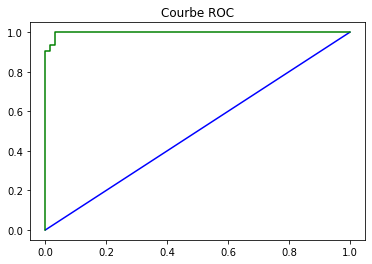

In [272]:
# ### Courbe ROC en test
# Construire la courbe ROC et calculer la valeur de l'AUC sur l'échantillon test. On utilise "scikit-learn" pour aller au plus court.

# In[61]:
#pouvoir faire apparaître le graphique dans le notebook 
%matplotlib inline 
#insérer le graphique 
import matplotlib.pyplot as plt 

#importer la librairie
import sklearn.metrics as metrics

#colonnes pour les courbes ROC
fprSm, tprSm, _ = metrics.roc_curve(yTest,predProbaSm,pos_label=1)

#graphique
#construire la diagonale
plt.plot(numpy.arange(0,1.1,0.1),numpy.arange(0,1.1,0.1),'b')

#rajouter notre diagramme
plt.plot(fprSm,tprSm,"g")

#titre
plt.title("Courbe ROC")

#faire apparaître
plt.show()

In [273]:
# In[62]:

#valeur de l'AUC
aucSm = metrics.roc_auc_score(yTest,predProbaSm)
print("AUC : %.4f" % (aucSm))

AUC : 0.9976


### Régression logistique avec Scikit learn (approche machine learning)
___

In [274]:
#importation 
import sklearn 
#version 
print(sklearn.__version__)

1.1.1


In [275]:
#importation de la classe de calcul 
from sklearn.linear_model import LogisticRegression 
#instanciation 
lrSk = LogisticRegression(penalty='none') 
#lancement des calculs 
#pas nécessaire de rajouter la constante 
lrSk.fit(xTrain,yTrain)

LogisticRegression(penalty='none')

In [276]:
#affichage des coefficients 
print(pandas.DataFrame({"var":xTrain.columns,"coef":lrSk.coef_[0]}))

          var      coef
0       clump  0.509873
1   ucellsize -0.055404
2  ucellshape  0.325869
3  mgadhesion  0.232236
4      sepics  0.026766
5     bnuclei  0.465961
6  bchromatin  0.383524
7    normnucl  0.200543
8     mitoses  0.541757


In [277]:
#la constante 
print(lrSk.intercept_)

[-9.41353441]


In [278]:
#importation de l'outil 
from sklearn import preprocessing 
#instanciation 
stds = preprocessing.StandardScaler() 
#transformation 
ZTrain = stds.fit_transform(xTrain) 
print(scipy.stats.describe(ZTrain,axis=0,ddof=0))

DescribeResult(nobs=600, minmax=(array([-1.21231083, -0.69981534, -0.74159116, -0.63550921, -1.01117585,
       -0.71598597, -1.0035247 , -0.61134511, -0.34120119]), array([1.98733652, 2.20710992, 2.23358881, 2.53323478, 3.10053318,
       1.78648925, 2.69547421, 2.33095756, 4.81982525])), mean=array([-3.99680289e-17,  1.19904087e-16,  4.16333634e-17, -7.99360578e-17,
       -5.18104078e-17, -8.88178420e-17, -6.43929354e-17,  9.62193288e-18,
        1.77635684e-17]), variance=array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), skewness=array([0.58906473, 1.2113343 , 1.14910617, 1.52807909, 1.70848743,
       0.9816285 , 1.08316422, 1.4203911 , 3.55201146]), kurtosis=array([-6.16985686e-01,  6.09656988e-03, -7.08874925e-02,  1.01272012e+00,
        2.16819811e+00, -7.72526397e-01,  1.26366791e-01,  4.64622762e-01,
        1.24354735e+01]))


In [279]:
#instanciation 
lrSkStd = LogisticRegression(penalty='none') 
#lancement des calculs -- pas nécessaire de rajouter la constante 
lrSkStd.fit(ZTrain,yTrain) 
#affichage des coefficients 
print(pandas.DataFrame({"var":xTrain.columns,"coef":lrSkStd.coef_[0]}))

          var      coef
0       clump  1.434265
1   ucellsize -0.171495
2  ucellshape  0.985702
3  mgadhesion  0.659614
4      sepics  0.058566
5     bnuclei  1.675860
6  bchromatin  0.933158
7    normnucl  0.613445
8     mitoses  0.944667


In [280]:
#correction des coefficients - dé-standardisation 
#par les écarts-type utilisés lors de la standardisation des variables 
coefUnstd = lrSkStd.coef_[0] / stds.scale_ 
#affichage des coefficients corrigés 
print(pandas.DataFrame({"var":xTrain.columns,"coef":coefUnstd}))

          var      coef
0       clump  0.509905
1   ucellsize -0.055392
2  ucellshape  0.325849
3  mgadhesion  0.232238
4      sepics  0.026756
5     bnuclei  0.465978
6  bchromatin  0.383528
7    normnucl  0.200549
8     mitoses  0.541717


In [281]:
#pour la constante, l'opération est plus complexe 
interceptUnStd = lrSkStd.intercept_ + numpy.sum(lrSkStd.coef_[0]*(-stds.mean_/stds.scale_)) 
print(interceptUnStd)

[-9.41371545]


In [282]:
#probabilités d'affectation 
proba01 = lrSkStd.predict_proba(ZTrain) 
#affichage des 5 premières valeurs 
print(proba01[:5,:])

[[3.57268749e-04 9.99642731e-01]
 [9.89769835e-01 1.02301655e-02]
 [9.98294693e-01 1.70530689e-03]
 [9.97163655e-01 2.83634489e-03]
 [9.92175104e-01 7.82489556e-03]]


In [283]:
#récupération de la colonne n°1 
proba1 = proba01[:,1] 
#description stat 
print(scipy.stats.describe(proba1))

DescribeResult(nobs=600, minmax=(0.0011320559604835626, 0.999999858467137), mean=0.34833318595143603, variance=0.2048860052326848, skewness=0.6470627840654125, kurtosis=-1.5308025939038277)


In [284]:
#log-vraisemblance 
log_likelihood = numpy.sum(yTrain*numpy.log(proba1)+(1.0-yTrain)*numpy.log(1.0-proba1)) 
print(log_likelihood)

-52.12266171709349


In [285]:
#transformation de l'échantillon test 
ZTest = stds.transform(xTest) 
#stat. descriptives 
print(scipy.stats.describe(ZTest,axis=0,ddof=0))

DescribeResult(nobs=98, minmax=(array([-1.21231083, -0.69981534, -0.74159116, -0.63550921, -1.01117585,
       -0.71598597, -1.0035247 , -0.61134511, -0.34120119]), array([1.98733652, 2.20710992, 2.23358881, 2.53323478, 3.10053318,
       1.78648925, 2.69547421, 2.33095756, 4.81982525])), mean=array([ 0.0174856 , -0.06701528, -0.07706683,  0.01117324,  0.01442051,
       -0.03220305, -0.00538214, -0.00420329, -0.01936848]), variance=array([1.01414884, 0.7875761 , 0.74153281, 1.0718781 , 1.16311775,
       1.01796193, 1.02731486, 0.97499214, 0.76550587]), skewness=array([0.60980866, 1.30884618, 1.12838688, 1.46540585, 1.67958366,
       1.02859773, 1.16751087, 1.3967306 , 3.41762105]), kurtosis=array([-0.71183833,  0.55845245,  0.20116266,  0.69513937,  1.89260733,
       -0.73362592,  0.41995856,  0.39619837, 12.19144896]))


In [286]:
#appliquer la prédiction 
predSk = lrSkStd.predict(ZTest) 
print(numpy.unique(predSk,return_counts=True))

(array([0, 1]), array([65, 33]))


In [287]:
import sklearn.metrics as metrics
#matrice de confusion 
print(metrics.confusion_matrix(yTest,predSk))

[[64  2]
 [ 1 31]]


In [288]:
#rapport sur la qualité de prédiction 
print(metrics.classification_report(yTest,predSk))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.94      0.97      0.95        32

    accuracy                           0.97        98
   macro avg       0.96      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



### Régression logistique régularisée

#### Conclusion
---
Les deux librairies étudiées,  « statsmodels » et « scikit-learn », sont différentes dans leur philosophie  et les fonctionnalités proposées. La première, comme son nom l’indique, est empreinte d’une forte culture statistique. La seconde a une approche plutôt « machine learning ». Mais elles se rejoignent dans les résultats.

### Régression logistique régularisée
---

In [291]:
#coef. standardisés de LogisticRegression
regStd = LogisticRegression()
regStd.fit(ZTrain,yTrain)

#coefficients
beta = pandas.DataFrame(regStd.coef_[0],index=X.columns,columns=['beta'])
print(beta)

                beta
clump       1.265670
ucellsize   0.101389
ucellshape  0.791617
mgadhesion  0.569762
sepics      0.137107
bnuclei     1.508784
bchromatin  0.829517
normnucl    0.558114
mitoses     0.741782


In [289]:
#régression ridge, fortement régularisé
regRidge = LogisticRegression(penalty='l2',C=0.05)
regRidge.fit(ZTrain,yTrain)

#coefs. Ridge
print(pandas.DataFrame(regRidge.coef_[0],index=X.columns,columns=(['ridge'])))

               ridge
clump       0.681075
ucellsize   0.415511
ucellshape  0.511493
mgadhesion  0.367608
sepics      0.298526
bnuclei     0.834232
bchromatin  0.512929
normnucl    0.404884
mitoses     0.304306


In [292]:
#constante
regRidge.intercept_

array([-0.97235764])

In [293]:
#à comparer avec param. par défaut
#qui étaient penalty='l2' et 'C = 1.0'
print(beta)

                beta
clump       1.265670
ucellsize   0.101389
ucellshape  0.791617
mgadhesion  0.569762
sepics      0.137107
bnuclei     1.508784
bchromatin  0.829517
normnucl    0.558114
mitoses     0.741782


In [294]:
#constante
regStd.intercept_

array([-1.111891])

In [295]:
#Lasso - nous oblige à changer d'algo d'optimisation
regLasso = LogisticRegression(penalty='l1',C=0.01,solver='saga')
regLasso.fit(ZTrain,yTrain)

#coefs. Lasso -- on bobserve l'effet "sélection de variables"
print(pandas.DataFrame(regLasso.coef_[0],index=X.columns,columns=(['lasso'])))

               lasso
clump       0.071201
ucellsize   0.332722
ucellshape  0.318667
mgadhesion  0.000000
sepics      0.000000
bnuclei     0.524587
bchromatin  0.027269
normnucl    0.000000
mitoses     0.000000


In [296]:
#constante
regLasso.intercept_

array([-0.7358003])

In [297]:
#elasticnet -- choix de l'algo contraint également
#nouveau param. avec l1_ratio
regElastic = LogisticRegression(penalty='elasticnet',l1_ratio=0.5,C=0.01,solver='saga')
regElastic.fit(ZTrain,yTrain)

#coefs. elasticnet -- on observe l'effet "sélection de variables"
print(pandas.DataFrame(regElastic.coef_[0],index=X.columns,columns=(['elastic'])))

             elastic
clump       0.280421
ucellsize   0.279475
ucellshape  0.295232
mgadhesion  0.111045
sepics      0.098714
bnuclei     0.454536
bchromatin  0.223819
normnucl    0.170203
mitoses     0.000000


In [298]:
#constante
regElastic.intercept_

array([-0.80671471])

In [299]:
#grille de recherche, ex. pour Ridge
#jouer sur le coefficient de régularisation
parametres = [{'C':[0.001,0.01,0.05,0.1,0.5,1.0,10.0,100.0]}]

#évaluation en validation croisée
#avec le critère accuracy
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=regRidge,param_grid=parametres,scoring='accuracy',cv=10)
grid.fit(ZTrain,yTrain)

GridSearchCV(cv=10, estimator=LogisticRegression(C=0.05),
             param_grid=[{'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0,
                                100.0]}],
             scoring='accuracy')

In [300]:
#affichage
print(pandas.DataFrame.from_dict(grid.cv_results_).loc[:,['params','mean_test_score']])

         params  mean_test_score
0  {'C': 0.001}         0.888333
1   {'C': 0.01}         0.955000
2   {'C': 0.05}         0.961667
3    {'C': 0.1}         0.966667
4    {'C': 0.5}         0.965000
5    {'C': 1.0}         0.965000
6   {'C': 10.0}         0.963333
7  {'C': 100.0}         0.963333
